In [ ]:
#!git clone https://github.com/neuralcomputer/ML_School.git

# Тема 10. Генеративно-состязательные сети.

## Введение

На прошлом занятии мы создавали состязательные атаки для нейронных сетей, т.е. учились их ломать. А нельзя ли использовать такой подход для созидания, чтобы он приносил пользу?

Можно! Раз мы смогли создать атаку, то тем самым сгенерировали вход, который классифиактор принимает за нормальный объект какого-либо из классов, т.е. сделали вход *похожий* на заданный. 

Пойдем дальше, откажемся от незаметности атаки, тогда создаваемые входы будут существенно отличаться от заданного, но, с точки зрения классификатора, все равно будут *похожи* на объекты заданного класса. Мы сгенерировали, создали, объект похожий на заданный, но отличающийся от него.

Если классификатор хорош, то похожесть для него будет и похожестью для человека. Значит можем создавать объекты похожие на что-то, например нарисовать что-то похожее на котика. 

Теперь нам неважно какие именно классы у классификатора, оставим только два класса **/похож/** или **/не похож/** на заданный. Классификатор станет бинарным, его задача различить два этих класса, назовем его дискриминатором (от англ. discriminate, различать).

Для обучения дискриминатора нужно собрать данные, примеры этих двух классов. С классом **похож** все просто, наберем примеров нужных нам, например, изображений котиков, из реального мира. 

Для класса **не похож** примеры будем создавать сами. Воспользоваться теми методами, которые мы изучали на прошлом занятии не получится, они очень простые, не могут дать сложных изменений, часто не срабатывают и вообще-то делают малозаметные атаки, от чего мы отказались. Нужно создавать такие примеры более сложным способом. А пускай этим занимается другая нейронная сеть!

![img](https://drive.google.com/uc?id=1SUQfLjn2G3GT_zh5DmpFBXPcwKQPpAXR)

Введем вторую нейронную сеть, которая будет создавать, генерировать, входы в дискриминатор, пытаясь его обмануть. Назовем такую сеть генератором (от англ. generate, создавать). Но поскольку мы-то знаем, что эти входы созданы генератором, то можем дискриминатору об этом сообщить.

Итак, дискриминатор учится различать всего два класса объектов, настоящие и сгенерированные. Это обычная нейронная сеть, которую мы умеем обучать.

А что с генератором? Его тоже нужно обучать. Но мы не знаем указаний учителя (желаемых выходов) для генератора, поскольку это его задача создать такие выходы (они же входы в дискриминатор), которые обманут дискриминатор. Но мы можем проверить, а дискриминатор обманулся или нет. 
Значит можем посчитать ошибку обучения генератора используя дискриминатор!
Если дискриминатор обманулся, то созданные генератором выходы - "хорошие", а если нет - "плохие". Можем и численно это посчитать.

Другими словами, указания учителя для генератора это не его желаемые выходы, а желаемые выходы для дискриминатора для тех выходов генератора, которые он создал. И эти желаемые выходы должны иметь для генератора класс **похож**. 

Для обучения нейронной сети нам надо считать производную функции ошибки по параметрам нейронной сети. Для генератора мы сделали функцию ошибки использую выходы дискриминатора, значит можем считать и ее производную. При этом можно пользоваться обычным  методом обратного распространения ошибки, только помнить, что обратно распространять ошибку для генератора придется через дискриминатор.

Нет проблем, генератор - нейронная сеть, дискриминатор - нейронная сеть. Их объединение тоже нейронная сеть. И для этой объединенной нейронной сети нам известна функция ошибки. Обучаем ее, но принудительно не трогаем вторую часть, отвечающую за дискриминатор (т.е. не обучаем ее). Еще раз, генератор обучается через дискриминатор.

Что ж, теперь мы способны обучать и дискриминатор и генератор. Но тут нас ожидает неприятность. Если мы сначала очень хорошо обучили дискриминатор, то генератору просто не хватит сил обмануть его, дискриминатор будет четко отличать настоящие примеры от сгенерированных. 

Выход - обучать дискриминатор и генератор попеременно. Сначала и дискриминатор и генератор обучены плохо, генератору легче обучиться обманывать плохой дискриминатор. Потом доучиваем дискриминатор, он становится посильнее, а генератор не трогаем. Дообучив дискриминатор, дообучаем генератор, не трогая дискриминатор. И так много раз. Генератор и дискриминатор состязаются друг с другом, отсюда и название подхода - генеративно-состязательная сеть, Generative-Adversarial Network, GAN .

Еще одна проблема, что будет входом в генератор? По идее, чтобы создавать выходы, вход вовсе необязателен. Но если входа нет, то выход всегда будет один и тотже (определяется весами нейронной сети), нам бы хотелось разнообразия, чтобы разные *похожие* объекты можно было генерировать.

Для этого генератору делают вход из каких-то чисел, часто случайных. И это заставляет генератор создавать разные выходы. Вход в генератор назвали *латентными* переменными, можно думать о них как о *неявном* номере генерируемого примера. Они могут быть чисто случайными или нет. 

Поиграть с интерактивным GAN можно по этой [ссылке](https://poloclub.github.io/ganlab/).


# Генерируем синусоиды
Качественная генерация с нуля изображений с большим разрешением требует длительных расчетов (дни, недели) и мощных компьютеров. Мы посмотрим лишь на простые примеры. Сегодня сгенерируем одномерную функцию (синусоиду), на следующем занятии - небольшие изображения.      

Наша цель сегодня - научиться генерировать графики функции, похожей на синусоиду. Синусоиду можно описать как 

$ y= A * sin( B * x +C) $
где A - амплитуда, B - частота и C - фаза синусоиды.

Надо создать примеры "настоящих" синусоид, на которых будем обучать нашу GAN. Для простоты амплитуду менять не будем, только фазу и частоту.


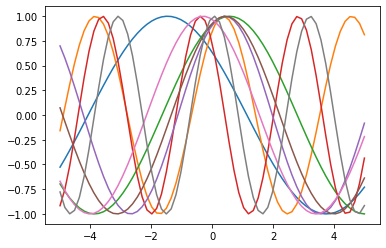

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint, uniform

SAMPLE_LEN = 64       # N число точек в графике кривой
NOISE_LEN=8           # размер латентных переменных
SAMPLE_SIZE = 32768//1   # число кривых для обучения
X_MIN = -5.0          # минимальное  
X_MAX = 5.0           # и максимальное значение аргумента
 
# Значения аргумента для точек графика
X_COORDS = np.linspace(X_MIN , X_MAX, SAMPLE_LEN)
 
# Обучающие данные - синусоиды
SAMPLE = np.zeros((SAMPLE_SIZE, SAMPLE_LEN)) # хранилище обучающих данных
for i in range(0, SAMPLE_SIZE): # в цикле по количеству примеров обучения 
    b = uniform(0.5, 2.0) # случайно выбираем частоту
    c = uniform(np.math.pi) # и фазу (амплитуду не изменяем)
    SAMPLE[i] = np.array([np.sin(b*x + c) for x in X_COORDS]) # создаем синусоиду
    
# нарисуем первые 8 примеров
fig, axis = plt.subplots(1, 1) #
for i in range(8): #
    axis.plot(X_COORDS, SAMPLE[i]) #

Создадим сети дискриминатора и генератора, воспользуемся библиотекой [Keras](https://keras.io/) , потребуется и [Tensorflow](https://www.tensorflow.org/). Для этого примера нам будет достаточно неглубоких полносвязных (dense) сетей, вы можете менять их архитектуру по своему желанию.


**Дискриминатор** имеет N (число точек графика) входов и один выход. Для настоящих синусоид желаемый выход равен 1, для ненастоящих 0. Для лучшей обобщающей способности будем использовать слои dropout. Вы можете сделать свою внутреннюю архитектуру, при условии соблюдения размерности входов\выходов. 

In [ ]:
from keras.models import Sequential # модели keras для последовательного подключения слоев нейронной сети без разветвлений
from keras.layers import Dense, Dropout, LeakyReLU # слои нейронной сети
from keras.optimizers import Adam
DROPOUT = Dropout(0.4)        # величина dropout 
discriminator = Sequential() # создаем пустую модель дискриминатора 
# и добавляем в нее слои
discriminator.add(Dense(2*SAMPLE_LEN,#  1ый полносвязный слой. число нейронов можно менять
                        activation="relu")) # функция активации для него
discriminator.add(DROPOUT) # слой dropout 
discriminator.add(Dense(2*SAMPLE_LEN, activation="relu")) # 2ой полносвязный слой, можно менять
discriminator.add(DROPOUT) # еще слой dropout
discriminator.add(Dense(1, activation = "sigmoid")) # последний выходной полносвязный слой, 1 нейрон.
# прочие параметры дискриминатора
optimizer=Adam(learning_rate=0.005) # можно задать параметры обучения, пусть дискриминатор обучается быстрее (по умолчанию 0.001)
discriminator.compile(optimizer = optimizer, # метод обучения
                      loss = "binary_crossentropy", # функция ошибки
                      metrics = ["accuracy"]) # функция для тестирования (метрика)


**Генератор** в некотором смысле это зеркальное отражение дискриминатора. Он принимает некоторый вход - шум, а возвращает N (число точек графика) выходов, которые затем поступают на дискриминатор. Поскольку эти выходы описывают график кривой, для синусоиды нужно чтобы они были в диапазоне -1 до +1. Используем, например, гипертангенс в качестве функции активации последнего слоя. На других слоях будем использовать, скажем, leaky-relu функцию,которая кусочно-линейная, а вообще, попробуйте и другие.

In [ ]:
LEAKY_RELU = LeakyReLU(0.2)   # коэффициент отрицательной части LeakyReLU
generator = Sequential() # создаем пустую модель генератора
# и добавляем в нее слои
generator.add(Dense(SAMPLE_LEN)) # 1ый полносвязный слой, можно менять
generator.add(LEAKY_RELU) # функция активации для него
generator.add(Dense(512)) # 2ой полносвязный слой, можно менять
generator.add(LEAKY_RELU) # функция активации для него
generator.add(Dense(SAMPLE_LEN, activation = "tanh")) # последний выходной полносвязный слой, SAMPLE_LEN нейронов.
# прочие параметры генератора
generator.compile(optimizer = "adam", # метод обучения
                  loss = "mse", # функция ошибки. Это не классификатор, поэтому mse подойдет.
                  metrics = ["accuracy"]) # функция для тестирования (метрика)


Теперь создадим сам **GAN** - объединение  генератора и дискриминатора.

In [ ]:
gan = Sequential() # пустая его модель
gan.add(generator) # добавляем генератор
gan.add(discriminator) # добавляем дискриминатор (не перепутайте порядок)
gan.compile(optimizer = "adam", # метод обучения
            loss = "binary_crossentropy", # функция ошибки, очевидно такая же как у дискриминатора.
            metrics = ["accuracy"]) # метрика

Дискриминатор должен обучаться отдельно, попеременно с генератором. Генератор же обучается в составе этой объединенной сети GAN. Надо реализовать такой подход:

Каждую эпоху обучения будем обучать пакетами (batch) и дискриминатор и генератор:

- 1) сначала генератор создает несколько выходов - примеров того, что он считает синусоидами. Для этого подаем на генератор несколько случайных входов, считаем выход и **запоминаем** его в пакете.

- 2) из реальных обучающих примеров берем несколько примеров и дописываем их в пакет. Для примеров реальных синусоид назначаем указание учителя 1, для примеров сгенерированных 0. 

- 3) обучаем дискриминатор на этом пакете.

- 4) обучаем составной GAN (с генератором и дискриминаторам), примеры входов в него - те случайные входы что были на шаге 1), примеры выходов (указания учителя) - единицы для примеров из пакета, которые были сгенерированы. Здесь мы обучаемся только на сгенерированных примерах, ведь только на них влияет генератор. Цель же - обмануть дискриминатор, т.е. чтобы его выход был равен 1. Поэтому указания учителя для обучения генератора и дискриминатора противоположные. В этом составном GANе вторая часть - копия дискриминатора и ее мы не обучаем. А первая часть это копия генератора, ее-то мы обучаем. 

Если дискриминатор обучен плохо, то генератору очень легко его обмануть, и обучение практически прекращается. Поэтому давайте предварительно  обучим дискриминатор отдельно от генератора на нескольких эпохах. Возьмем три набора данных: настоящие (желаемый выход равен 1), созданные генератором (желаемый выход равен 0) и просто случайные (желаемый выход равен 0).

Если дискриминатор не идеален, то у генератора слишком много возможностей обмануть его. И при этом примеры похожие на настоящие для дискриминатора, могут быть совсем непохожи на настоящие для нас. Чтобы хоть как-то заставить генератор делать именно синусоиды, применим небольшую хитрость.

Давайте немножко обучим генератор отдельно, примеры входа в него - шум, а указания учителя - *настоящие синусоиды*. Тогда генератор будет изначально генерировать что-то близкое к синусоидам. Но нельзя  обучать так генератор слишком хорошо, иначе он просто запомнит настоящие примеры и смысл в нашей работе потеряется вовсе. Поэтому будем учить его лишь несколько эпох.

А после всех этих предварительных шагов, пусть уж дискриминатор и генератор обучаются попеременно.

Обучение GANов долгий процесс, запаситесь терпением (~20 минут).


In [ ]:
#EPOCHS = 128 # число эпох
#BATCH =64 # размер пакета
NOISE = uniform(X_MIN, X_MAX, size = (SAMPLE_SIZE, NOISE_LEN)) # шум-вход в генератор, у нас будет одинаковое количество настоящих и сгенерированных примеров
ONES = np.ones((SAMPLE_SIZE)) # указания учителя для настоящих примеров, единицы
ZEROS = np.zeros((SAMPLE_SIZE)) # указания учителя для сгенерированных примеров, нолики

GENERATOR PRETRAINING
512/512 [==============================] - 3s 2ms/step - loss: 0.4035 - accuracy: 0.0465


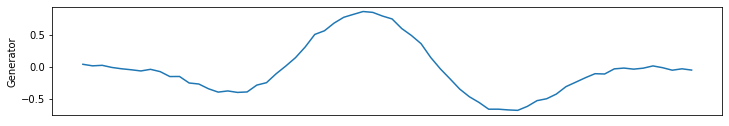

In [ ]:
# предобучение генератора
BATCH =64 # размер пакета
print('GENERATOR PRETRAINING')
generator.fit(NOISE,SAMPLE,epochs=1,batch_size=BATCH)

# пример выхода генератора
y = generator.predict(uniform(X_MIN, X_MAX, size = (1, NOISE_LEN)))[0] #
fig = plt.figure(figsize = (12, 2))
ax = fig.subplots()  #
ax.xaxis.set_visible(False) #
plt.plot(X_COORDS, y) #
plt.ylabel("Generator") #
plt.show()

In [ ]:
# предобучение дискриминатора
EPOCHS_DISCR=20 # число эпох предобучения дискриминатора
BATCH =64 # размер пакета
print('DISCRIMINATOR PRETRAINING')
print("epoch | dis. loss | dis. acc")
print("------+-----------+---------")
NOISE_SAMPLE = uniform(X_MIN, X_MAX, size = (SAMPLE_SIZE, SAMPLE_LEN)) # примеры шума для дискриминатора
# 
for e in range(EPOCHS_DISCR): # в цикле по количеству эпох
    for k in range(SAMPLE_SIZE//BATCH): # в цикле по количеству пакетов в одной эпохе
        # 
        n = randint(0, SAMPLE_SIZE, size = BATCH) # случайно выбираем для пакета примеры входа-шума в генератор
        p = generator.predict(NOISE[n]) # считаем выходы генератора для каждого выбранного входа и записываем их в пакет
        x = np.concatenate((SAMPLE[n],NOISE_SAMPLE[n], p)) # добавляем в пакет случайно выбранные настоящие примеры SAMPLE и шумовые NOISE_SAMPLE 
        y = np.concatenate((ONES[n],ZEROS[n],ZEROS[n])) # указания учителя для них: настощие синусоиды - 1, сгенерированные и шум - 0
        d_result = discriminator.train_on_batch(x, y) # обучаем дискриминатор на этом пакете
    print(f" {e:04n} |  {d_result[0]:.5f}  |  {d_result[1]:.5f} | ")
 

DISCRIMINATOR PRETRAINING
epoch | dis. loss | dis. acc
------+-----------+---------
 0000 |  0.00116  |  1.00000 | 
 0001 |  0.00126  |  1.00000 | 
 0002 |  0.00004  |  1.00000 | 
 0003 |  0.00039  |  1.00000 | 
 0004 |  0.00002  |  1.00000 | 
 0005 |  0.00003  |  1.00000 | 
 0006 |  0.00004  |  1.00000 | 
 0007 |  0.00000  |  1.00000 | 
 0008 |  0.00007  |  1.00000 | 
 0009 |  0.00001  |  1.00000 | 
 0010 |  0.00001  |  1.00000 | 
 0011 |  0.00005  |  1.00000 | 
 0012 |  0.00005  |  1.00000 | 
 0013 |  0.00001  |  1.00000 | 
 0014 |  0.00001  |  1.00000 | 
 0015 |  0.00002  |  1.00000 | 
 0016 |  0.00001  |  1.00000 | 
 0017 |  0.00003  |  1.00000 | 
 0018 |  0.00002  |  1.00000 | 
 0019 |  0.00008  |  1.00000 | 


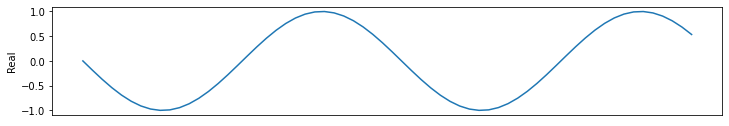

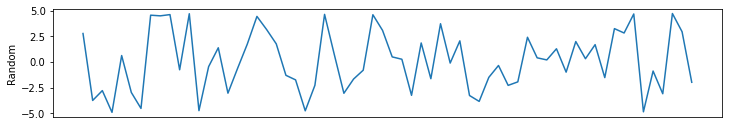

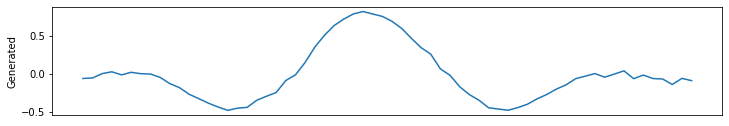

In [ ]:

# пример настоящей синусоиды, случайного примера и выхода генератора, которые были в обучении дискриминатора
Text=['Real','Random','Generated']
for i in range(3):
    tmp=x[0+i*BATCH]
    fig = plt.figure(figsize = (12, 2))
    ax = fig.subplots()  #
    ax.xaxis.set_visible(False) #
    plt.plot(X_COORDS, tmp) #
    plt.ylabel(Text[i]) #
    plt.show()

GAN TRAINING
epoch | dis. loss | dis. acc | gen. loss | gen. acc
------+-----------+----------+-----------+----------
 0000 |  0.37885  |  0.82031 |  2.24618  |  0.17188
 0001 |  0.36538  |  0.84375 |  2.02353  |  0.12500
 0002 |  0.43280  |  0.80469 |  2.42104  |  0.07812
 0003 |  0.25083  |  0.90625 |  3.23636  |  0.07812


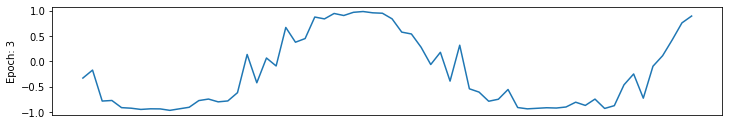

 0004 |  0.35428  |  0.87500 |  3.03506  |  0.01562
 0005 |  0.23986  |  0.90625 |  2.98073  |  0.04688
 0006 |  0.15905  |  0.93750 |  2.87487  |  0.07812
 0007 |  0.19736  |  0.92188 |  2.45187  |  0.04688
 0008 |  0.25136  |  0.89844 |  2.57620  |  0.01562


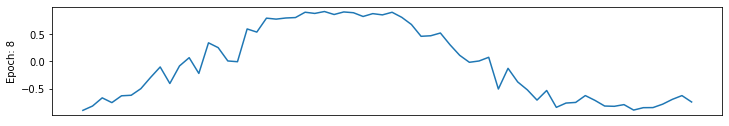

 0009 |  0.32572  |  0.89844 |  2.59228  |  0.03125
 0010 |  0.47154  |  0.81250 |  2.33885  |  0.03125
 0011 |  0.30138  |  0.87500 |  2.81763  |  0.04688
 0012 |  0.26223  |  0.87500 |  2.11675  |  0.03125
 0013 |  0.29553  |  0.89062 |  2.90329  |  0.03125


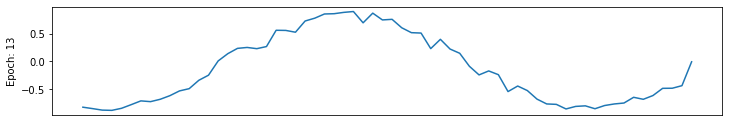

 0014 |  0.48758  |  0.78906 |  2.36984  |  0.03125
 0015 |  0.30927  |  0.89844 |  2.20866  |  0.00000
 0016 |  0.27874  |  0.89844 |  2.04510  |  0.03125
 0017 |  0.37405  |  0.82812 |  2.13107  |  0.06250
 0018 |  0.33701  |  0.86719 |  2.61415  |  0.01562


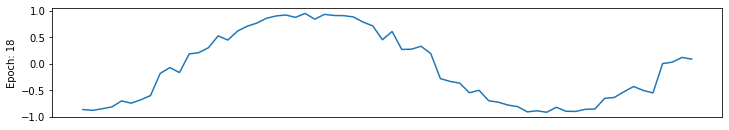

 0019 |  0.24197  |  0.90625 |  2.31117  |  0.01562
 0020 |  0.23860  |  0.91406 |  2.51144  |  0.00000
 0021 |  0.30407  |  0.89062 |  2.86010  |  0.00000
 0022 |  0.23295  |  0.92969 |  2.30968  |  0.00000
 0023 |  0.21561  |  0.91406 |  1.99563  |  0.03125


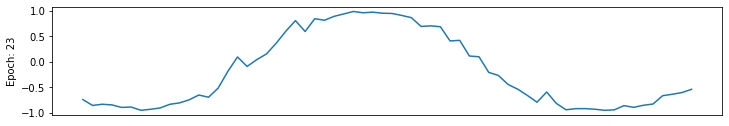

 0024 |  0.25868  |  0.89844 |  1.83203  |  0.06250
 0025 |  0.19894  |  0.93750 |  1.84273  |  0.01562
 0026 |  0.22326  |  0.92969 |  2.41011  |  0.04688
 0027 |  0.28845  |  0.86719 |  2.13854  |  0.03125
 0028 |  0.28957  |  0.88281 |  1.53958  |  0.04688


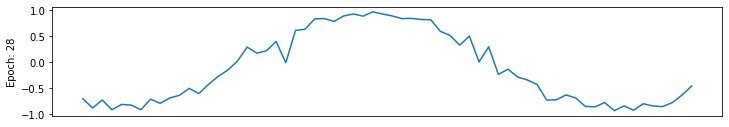

 0029 |  0.22258  |  0.92969 |  2.14945  |  0.00000
 0030 |  0.28988  |  0.87500 |  1.68541  |  0.00000
 0031 |  0.34056  |  0.85938 |  2.02699  |  0.01562


In [ ]:
# Обучение GAN
EPOCHS = 32 # число эпох обучения GAN
BATCH =64 # размер пакета
print('GAN TRAINING')
print("epoch | dis. loss | dis. acc | gen. loss | gen. acc")
print("------+-----------+----------+-----------+----------")

for e in range(EPOCHS): # в цикле по количеству эпох
    for k in range(SAMPLE_SIZE//BATCH): # в цикле по количеству пакетов в одной эпохе
        # 
        n = randint(0, SAMPLE_SIZE, size = BATCH) # случайно выбираем для пакета примеры входа-шума в генератор
        # 
        p = generator.predict(NOISE[n]) # считаем выходы генератора для каждого выбранного входа и записываем их в пакет
        x = np.concatenate((SAMPLE[n], p)) # добавляем в пакет случайно выбранные настоящие примеры 
        y = np.concatenate((ONES[n], ZEROS[n])) # указания учителя для них, первая половина - настоящие 1, вторая - сгенерированные 0
        d_result = discriminator.train_on_batch(x, y) # обучаем дискриминатор на этом пакете
        discriminator.trainable = False # отключаем возможность обучения для дискриминатора
        # обучаем на сгенерированной половине пакета GAN в целом, но обучаться будет только его первая часть (генератор).
        # при этом указания учителя - единицы, так как мы хотим, чтобы на этих сгенерированных примерах
        # дискриминатор говорил что это настоящие синусоиды
        g_result = gan.train_on_batch(NOISE[n], ONES[n]) # 
        discriminator.trainable = True # возвращаем возможность обучения для дискриминатора
    # печатаем информацию о прогрессе обучения
    print(f" {e:04n} |  {d_result[0]:.5f}  |  {d_result[1]:.5f} |  {g_result[0]:.5f}  |  {g_result[1]:.5f}")
   
    if e % 5 == 3: # каждые несколько эпох  строим графики того, что сгенерировал генератор
        
        fig = plt.figure(figsize = (12, 2)) 
        ax = fig.subplots() #
        plt.plot(X_COORDS, p[-1]) #
        ax.xaxis.set_visible(False) #
        plt.ylabel(f"Epoch: {e}") #
        #ax_index += 1 #
        plt.show()

Протестируйте генератор несколько раз. Если обучение действительно было, то он должен выдавать нечто, хоть сколько-нибудь похожее на синусоиду. 

Даже такой примитивный пример не получится быстро обучить генерации безупречных синусоид, всегда будут заметные погрешности.

В реальной жизни обучением GANов с нуля занимаются только владельцы мощных компьютеров, остальные же пользуются их результатами, **дообучая** GANы под свои данные.

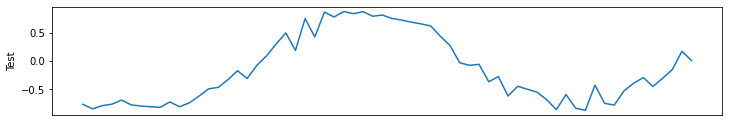

In [ ]:
# Тест обученного генератора из GAN
y = generator.predict(uniform(X_MIN, X_MAX, size = (1, NOISE_LEN)))[0] #
fig = plt.figure(figsize = (12, 2))
ax = fig.subplots()  #
ax.xaxis.set_visible(False) #
plt.plot(X_COORDS, y) #
plt.ylabel("Test") #
plt.show()

# Задания
В качестве домашнего задания попробуйте поменять архитектуру и параметры генератора и дискриминатора и добейтесь более красивого обучения. Но при этом помните, что существенное улучшение возможно только при существенном увеличении времени обучения, поэтому не стремитесь к идеальному обучению.



# Заключение
Сегодня существует множество разных уже обученных GANов, которые могут генерировать изображения, музыку, речь, текст и другие типы данных.

Придумано много модификаций, которые улучшают работу GANов, обычно используют уже заранее обученные сети для дискриминатора и генератора. На следующих занятиях мы познакомимся с некоторыми из них. 


## Ссылки

Использованы и адаптированы материалы:

https://www.codemotion.com/magazine/dev-hub/machine-learning-dev/how-to-build-a-gan-in-python/





